based pn http://docs.opencv.org/3.1.0/d7/d8b/tutorial_py_face_detection.html#gsc.tab=0

In [7]:
%matplotlib inline

In [17]:
!curl https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml > haarcascade_frontalface_default.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  908k  100  908k    0     0  1779k      0 --:--:-- --:--:-- --:--:-- 1781k


In [20]:
!curl https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_eye.xml > haarcascade_eye.xml

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  333k  100  333k    0     0   565k      0 --:--:-- --:--:-- --:--:--  566k


In [22]:
!curl https://facedetection.com/wp-content/uploads/m01-32_gr.jpg > m01-32_gr.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 90716  100 90716    0     0   185k      0 --:--:-- --:--:-- --:--:--  185k


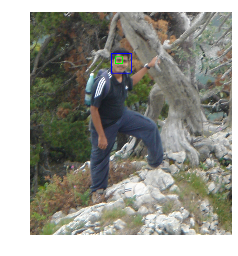

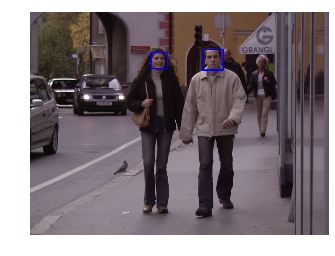

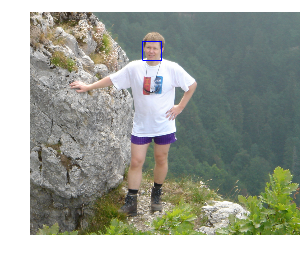

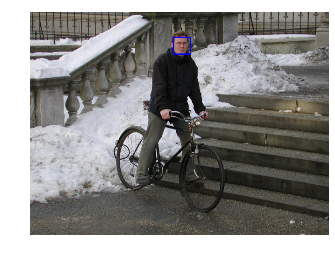

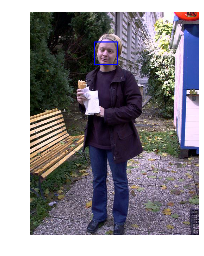

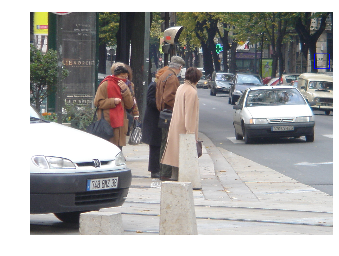

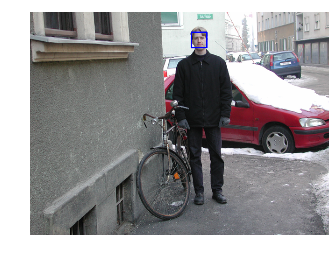

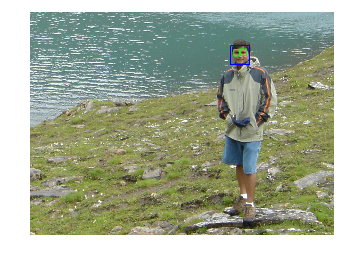

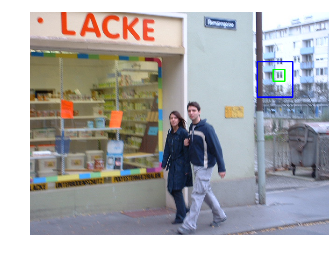

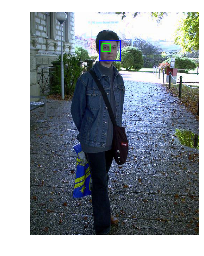

In [37]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import cv2
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

mypath = "/notebooks/INRIAPerson/Test/pos/"
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

onlyfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

cnt = 0
for filename in onlyfiles:
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if len(faces) == 0:
        continue
    for (x,y,w,h) in faces:
         cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
         roi_gray = gray[y:y+h, x:x+w]
         roi_color = img[y:y+h, x:x+w]
         eyes = eye_cascade.detectMultiScale(roi_gray)
         for (ex,ey,ew,eh) in eyes:
             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    
    plt.figure()
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    cnt = cnt + 1
    if cnt == 10:
        break